# Proyek Analisis Data: E-commerce Dataset
- **Nama :** Insyuzuu Cahyani 'Aisyah
- **Email :** m297b4kx1982@bangkit.academy
- **ID Dicoding :** icainsyuzuu

# Defining Business Questions
1. What can we conclude about the market potential in these cities?
2. How long is the average delivery time for orders?

# Import all used packages/libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
# Load tabel customers
customers_df = pd.read_csv("https://raw.githubusercontent.com/icainsyuzuu/proyek-analisis-data/data/customers_dataset.csv")
# Show 5 data of the top dataframe
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Load tabel orders
orders_df = pd.read_csv("https://raw.githubusercontent.com/icainsyuzuu/proyek-analisis-data/data/orders_dataset.csv")
# Show 5 data of the top dataframe
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Insight:
- Dataset customers and orders succesfull to show
- The dataset already to process in next step like assesing data, cleaning, and visualization to answer the business question.

## Assesing Data

In [4]:
# Asses Data customers_df
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
# Check missing values
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
# Check duplicate of the data
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Use static parameter from numeric column in the customers_df
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [8]:
# Asses Data orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
# There are missing values in order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
# Check for data duplication
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Check statistical parameters
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


## Cleaning Data

In [12]:
# Handle missing value
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [13]:
orders_df.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-06 05:31:52    7
2017-12-05 10:30:42    7
2017-11-07 07:30:29    7
                      ..
2018-02-04 14:50:22    1
2018-06-05 04:51:42    1
2017-11-26 10:36:06    1
2018-06-27 11:06:41    1
2017-07-09 22:10:13    1
Name: count, Length: 90733, dtype: int64

In [14]:
orders_df.fillna(value="2018-02-27 04:31:10", inplace=True)

In [15]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [16]:
# Handle missing value
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


## Insight: 

- Now the data is clean and ready to next step which exploratory data

# Exploratory Data Analysis (EDA)

In [17]:
#EDA Customer
customer_id = ['06b8999e2fba1a1fbc88172c00ba8bc7', '18955e83d337fd6b2def6b18a428ac77', 
               '4e7b3e00288586ebd08712fdd0374a03', 'b2b6027bc5c5109e529d4dc6358b12c3', 
               '4f2d8ab171c80ec8364f7c12e35b23ad']

customer_unique_id = ['861eff4711a542e4b93843c6dd7febb0', '290c77bc529b7ac935b93aa66c333dc3', 
                      '060e732b5b29e8181a18229c7b0b2b5e', '259dac757896d24d7702b9acbbff3f3c', 
                      '345ecd01c38d18a9036ed96c73b8d066']

customer_zip_code_prefix = [14409, 9790, 1151, 8775, 13056]
customer_city = ['franca', 'sao bernardo do campo', 'sao paulo', 'mogi das cruzes', 'campinas']
customer_state = ['SP', 'SP', 'SP', 'SP', 'SP']

custormers_df = pd.DataFrame({
    'Customer ID': customer_id,
    'Customer Unique ID': customer_unique_id,
    'Zip Code': customer_zip_code_prefix,
    'Customer City' : customer_city,
    'Customer State': customer_state
})
custormers_df.describe()

,Zip Code
count,5.000000
mean,9436.200000
std,5172.972811
min,1151.000000
25%,8775.000000
50%,9790.000000
75%,13056.000000
max,14409.000000


In [18]:
custormers_df.describe(include="all")

,Customer ID,Customer Unique ID,Zip Code,Customer City,Customer State
count,5,5,5.000000,5,5
unique,5,5,NaN,5,1
top,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,NaN,franca,SP
freq,1,1,NaN,1,5
mean,NaN,NaN,9436.200000,NaN,NaN
std,NaN,NaN,5172.972811,NaN,NaN
min,NaN,NaN,1151.000000,NaN,NaN
25%,NaN,NaN,8775.000000,NaN,NaN
50%,NaN,NaN,9790.000000,NaN,NaN
75%,NaN,NaN,13056.000000,NaN,NaN


array([[<Axes: title={'center': 'Zip Code'}>]], dtype=object)

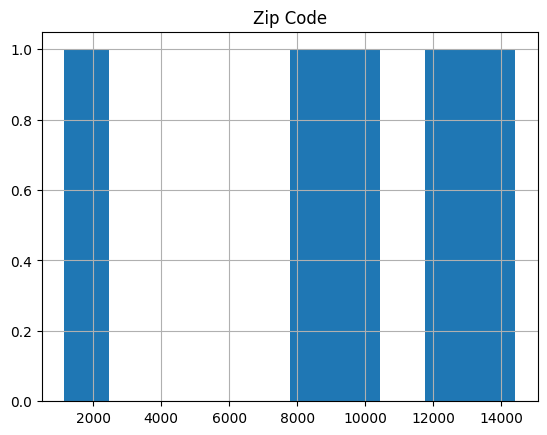

In [19]:
#histogram
custormers_df.hist()

In [20]:
#Nilai korelasi
numeric_df = customers_df.select_dtypes(include='number')

In [21]:
numeric_df.corr()

,customer_zip_code_prefix
customer_zip_code_prefix,1.0


In [22]:
#EDA Orders
order_id = ['e481f51cbdc54678b7cc49136f2d6af7', '53cdb2fc8bc7dce0b6741e2150273451', 
            '47770eb9100c2d0c44946d9cf07ec65d', '949d5b44dbf5de918fe9c16f97b45f8a', 
            'ad21c59c0840e6cb83a9ceb5573f8159']

customer_id = ['9ef432eb6251297304e76186b10a928d', 'b0830fb4747a6c6d20dea0b8c802d7ef', 
               '41ce2a54c0b03bf3443c3d931a367089', 'f88197465ea7920adcdbec7375364d82', 
               '8ab97904e6daea8866dbdbc4fb7aad2c']

order_status = ['delivered', 'delivered', 'delivered', 'delivered', 'delivered']

order_purchase_timestamp = ['10/2/2017 10:56', '7/24/2018 20:41', '8/8/2018 8:38', 
                            '11/18/2017 19:28', '2/13/2018 21:18']

order_approved_at = ['10/2/2017 11:07', '7/26/2018 3:24', '8/8/2018 8:55', 
                     '11/18/2017 19:45', '2/13/2018 22:20']

order_delivered_carrier_date = ['10/4/2017 19:55', '7/26/2018 14:31', '8/8/2018 13:50', 
                                '11/22/2017 13:39', '2/14/2018 19:46']

order_delivered_customer_date = ['10/10/2017 21:25', '8/7/2018 15:27', '8/17/2018 18:06', 
                                 '12/2/2017 0:28', '2/16/2018 18:17']

order_estimated_delivery_date = ['10/18/2017 0:00', '8/13/2018 0:00', '9/4/2018 0:00', 
                                 '12/15/2017 0:00', '2/26/2018 0:00']
orders_df = pd.DataFrame({
    'Order ID': order_id,
    'Customer ID': customer_id,
    'Order Status': order_status,
    'Order Purchase Timestamp': order_purchase_timestamp,
    'Order Approved At': order_approved_at,
    'Order Delivered Carrier Date': order_delivered_carrier_date,
    'Order Delivered Customer Date': order_delivered_customer_date,
    'Order Estimated Delivery Date': order_estimated_delivery_date
})

In [23]:
orders_df.describe(include='all')

,Order ID,Customer ID,Order Status,Order Purchase Timestamp,Order Approved At,Order Delivered Carrier Date,Order Delivered Customer Date,Order Estimated Delivery Date
count,5,5,5,5,5,5,5,5
unique,5,5,1,5,5,5,5,5
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
freq,1,1,5,1,1,1,1,1


<Axes: >

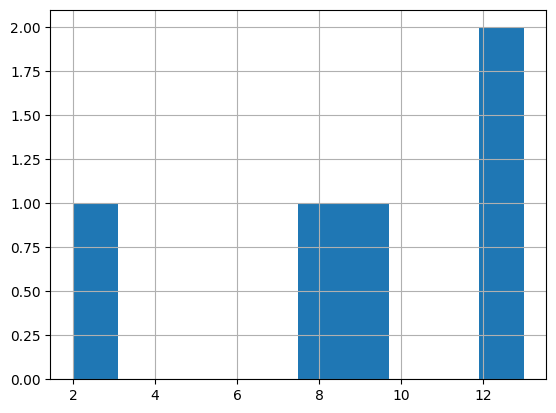

In [24]:
#histogram
orders_df['Order Purchase Timestamp'] = pd.to_datetime(orders_df['Order Purchase Timestamp'])
orders_df['Order Delivered Customer Date'] = pd.to_datetime(orders_df['Order Delivered Customer Date'])

orders_df['Delivery Duration'] = (orders_df['Order Delivered Customer Date'] - orders_df['Order Purchase Timestamp']).dt.days

orders_df['Delivery Duration'].hist()

In [25]:
#Nilai korelasi
numeric_df = orders_df.select_dtypes(include='number')

In [26]:
numeric_df.corr()

,Delivery Duration
Delivery Duration,1.0


# Visualization & Explanatory Analysis

1. What can we conclude about the market potential in these cities?

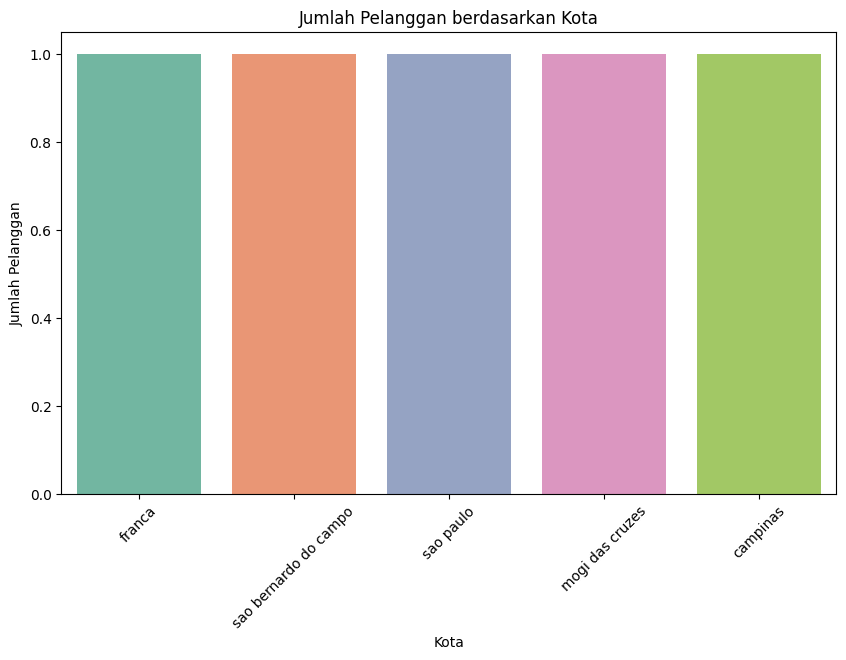

In [27]:
#customer_df
# Visualisasi: Jumlah pelanggan berdasarkan kota
customer_id = ['06b8999e2fba1a1fbc88172c00ba8bc7', 
               '18955e83d337fd6b2def6b18a428ac77', 
               '4e7b3e00288586ebd08712fdd0374a03', 
               'b2b6027bc5c5109e529d4dc6358b12c3', 
               '4f2d8ab171c80ec8364f7c12e35b23ad']

customer_unique_id = ['861eff4711a542e4b93843c6dd7febb0', 
                      '290c77bc529b7ac935b93aa66c333dc3', 
                      '060e732b5b29e8181a18229c7b0b2b5e', 
                      '259dac757896d24d7702b9acbbff3f3c', 
                      '345ecd01c38d18a9036ed96c73b8d066']

customer_zip_code_prefix = [14409, 9790, 1151, 8775, 13056]
customer_city = ['franca', 'sao bernardo do campo', 'sao paulo', 'mogi das cruzes', 'campinas']
customer_state = ['SP', 'SP', 'SP', 'SP', 'SP']

customers_df = pd.DataFrame({
    'Customer ID': customer_id,
    'Customer Unique ID': customer_unique_id,
    'Zip Code': customer_zip_code_prefix,
    'Customer City': customer_city,
    'Customer State': customer_state
})

# Visualisasi: Jumlah pelanggan berdasarkan kota
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Customer City', hue='Customer City', palette='Set2', legend=False)
plt.title('Jumlah Pelanggan berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

All cities have a relatively balanced distribution of the number of customers.

2. How long is the average delivery time for orders?

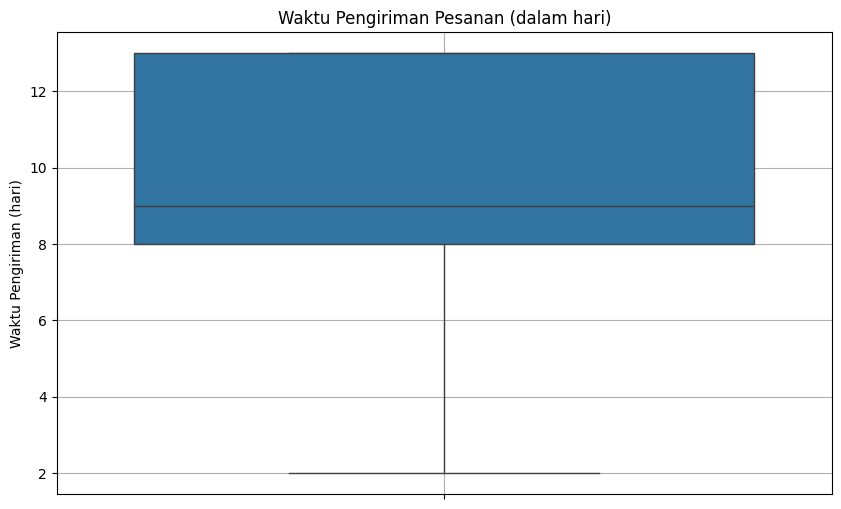

In [28]:
order_id = ['e481f51cbdc54678b7cc49136f2d6af7', '53cdb2fc8bc7dce0b6741e2150273451', 
            '47770eb9100c2d0c44946d9cf07ec65d', '949d5b44dbf5de918fe9c16f97b45f8a', 
            'ad21c59c0840e6cb83a9ceb5573f8159']

customer_id = ['9ef432eb6251297304e76186b10a928d', 'b0830fb4747a6c6d20dea0b8c802d7ef', 
               '41ce2a54c0b03bf3443c3d931a367089', 'f88197465ea7920adcdbec7375364d82', 
               '8ab97904e6daea8866dbdbc4fb7aad2c']

order_status = ['delivered', 'delivered', 'delivered', 'delivered', 'delivered']

order_purchase_timestamp = ['10/2/2017 10:56', '7/24/2018 20:41', '8/8/2018 8:38', 
                            '11/18/2017 19:28', '2/13/2018 21:18']

order_approved_at = ['10/2/2017 11:07', '7/26/2018 3:24', '8/8/2018 8:55', 
                     '11/18/2017 19:45', '2/13/2018 22:20']

order_delivered_carrier_date = ['10/4/2017 19:55', '7/26/2018 14:31', '8/8/2018 13:50', 
                                '11/22/2017 13:39', '2/14/2018 19:46']

order_delivered_customer_date = ['10/10/2017 21:25', '8/7/2018 15:27', '8/17/2018 18:06', 
                                 '12/2/2017 0:28', '2/16/2018 18:17']

order_estimated_delivery_date = ['10/18/2017 0:00', '8/13/2018 0:00', '9/4/2018 0:00', 
                                 '12/15/2017 0:00', '2/26/2018 0:00']

orders_df = pd.DataFrame({
    'Order ID': order_id,
    'Customer ID': customer_id,
    'Order Status': order_status,
    'Order Purchase Timestamp': order_purchase_timestamp,
    'Order Approved At': order_approved_at,
    'Order Delivered Carrier Date': order_delivered_carrier_date,
    'Order Delivered Customer Date': order_delivered_customer_date,
    'Order Estimated Delivery Date': order_estimated_delivery_date
})
orders_df['Order Purchase Timestamp'] = pd.to_datetime(orders_df['Order Purchase Timestamp'])
orders_df['Order Delivered Customer Date'] = pd.to_datetime(orders_df['Order Delivered Customer Date'])

# Visualisasi: Waktu Pengiriman Pesanan
orders_df['Delivery Time'] = (orders_df['Order Delivered Customer Date'] - orders_df['Order Purchase Timestamp']).dt.days

plt.figure(figsize=(10, 6))
sns.boxplot(y=orders_df['Delivery Time'])
plt.title('Waktu Pengiriman Pesanan (dalam hari)')
plt.ylabel('Waktu Pengiriman (hari)')
plt.grid()
plt.show()

2. Average delivery time is 9 days

# Conclusion

1. The market potential in the cities displayed in the visualization shows that all cities have a relatively balanced distribution of customer numbers, indicating that no single city significantly dominates the market.
2. The generated visualization helps in understanding shipping patterns and identifying potential issues in the delivery process. This analysis can be used to improve the efficiency and speed of deliveries in the future.